## Overview
### This Notebook will go through the process of running ZIP tests for comparing the frequency of clusters between 'free' and 'food' ants

## Setting up paths, importing dependencies and data

### Import necessary Python libraries

In [20]:
import os
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

### Importing cluster CSV data

In [21]:
DATA_PATH = "/Users/lukefoster/Documents/CompEtho/Cluster_Comparison_Pipeline_Antennae"

all_DF = pd.read_csv(f"{DATA_PATH}/all_clusters.csv", index_col=0)

In [22]:
all_DF

,Video File,cluster0,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,...,cluster38,cluster39,cluster40,cluster41,cluster42,cluster43,cluster44,cluster45,cluster46,cluster47
0,10BYmidfd_antmovie200928223820,0.0,0.0,0.0,0.161857,0.190715,0.196989,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
1,fr_no_antennae_antmovie200927211714,0.0,0.0,0.0,0.007194,0.244604,0.273381,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
2,00AAmidfr_antmovie200926195039,0.0,0.0,0.0,0.186091,0.222062,0.225899,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
3,04WTmidfr_antmovie201010202950,0.0,0.0,0.0,0.250520,0.163410,0.129730,0.0,0.0,0.025780,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
4,06WRmajfd_antmovie200929211318,0.0,0.0,0.0,0.166429,0.187807,0.115281,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,05WOmajfd_antmovie201010205850,0.0,0.0,0.0,0.127257,0.171477,0.270297,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
139,08dOminfd_antmovie200927211313,0.0,0.0,0.0,0.159574,0.021277,0.553191,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
140,10RYfr_left_antn_no_move_antmovie200927214552,0.0,0.0,0.0,0.104408,0.186195,0.319606,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
141,mean,0.0,0.0,0.0,0.177375,0.186876,0.169418,0.0,0.0,0.001878,...,0.0,0.0,0.000038,0.0,0.001176,0.000328,0.0,0.0,0.000074,0.001353


## Introducing ZIP (Zero-Inflated Poisson)

In [23]:
from patsy import dmatrices
import statsmodels.api as sm

### Formatting Data into Usable Dataframe

In [24]:
groups = ['fr', 'fd']

In [25]:
# remove video files that don't fit within specified caste keywords
try:
    for i in range(len(all_DF)):
        if any(group in all_DF["Video File"][i] for group in groups):
            pass
        else:
            all_DF = all_DF.drop(i)
except:
    print("already dropped un-wanted videos")


df = all_DF.reset_index(drop=True)

df["group"] = ""

for i in range(len(df)):
    for group in groups:
        if group in df["Video File"][i]:
            df["group"][i] += group
            
for i in range(len(df)):
    if df.isnull()["cluster0"][i]:
        df = df.drop(i)
        
df = df.reset_index(drop=True)

<ipython-input-25-f8bc65c57617>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["group"][i] += group


In [26]:
df

,Video File,cluster0,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,...,cluster39,cluster40,cluster41,cluster42,cluster43,cluster44,cluster45,cluster46,cluster47,group
0,10BYmidfd_antmovie200928223820,0.0,0.0,0.0,0.161857,0.190715,0.196989,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fd
1,fr_no_antennae_antmovie200927211714,0.0,0.0,0.0,0.007194,0.244604,0.273381,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fr
2,00AAmidfr_antmovie200926195039,0.0,0.0,0.0,0.186091,0.222062,0.225899,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fr
3,04WTmidfr_antmovie201010202950,0.0,0.0,0.0,0.250520,0.163410,0.129730,0.0,0.0,0.02578,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fr
4,06WRmajfd_antmovie200929211318,0.0,0.0,0.0,0.166429,0.187807,0.115281,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,03YBmajfr_antmovie200928195842,0.0,0.0,0.0,0.124230,0.183157,0.276605,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fr
127,03BPmajfr_antmovie200929200853,0.0,0.0,0.0,0.163443,0.177902,0.191774,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fr
128,05WOmajfd_antmovie201010205850,0.0,0.0,0.0,0.127257,0.171477,0.270297,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fd
129,08dOminfd_antmovie200927211313,0.0,0.0,0.0,0.159574,0.021277,0.553191,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fd


### Keeping Track of Cluster Distribution Between Groups

In [27]:
count_dict = {}

for cluster in range(df.shape[1]-2):
    count_dict[f'cluster{cluster}'] = {group : [] for group in groups}
    
    for index,proportion in enumerate(df[f'cluster{cluster}']):
        for group in groups:
            if proportion > 0 and df['group'][index] == group:
                count_dict[f'cluster{cluster}'][group].append(df['Video File'][index])

count_dict

{'cluster0': {'fr': [], 'fd': []},
 'cluster1': {'fr': [], 'fd': []},
 'cluster2': {'fr': [], 'fd': []},
 'cluster3': {'fr': ['fr_no_antennae_antmovie200927211714',
   '00AAmidfr_antmovie200926195039',
   '04WTmidfr_antmovie201010202950',
   '07YTminfr_antmovie200928210913',
   '09OOminfr_antmovie200927212511',
   '03dRmajfr_antmovie200924195844',
   'frightened_antmovie200927234327',
   '03dBmidfr_antmovie200926203136',
   '11RBminfr_antmovie200927221547',
   '06WRmajfr_antmovie200929210434',
   '05DDminfr_antmovie200926210700',
   '03WPmajfr_antmovie201010200214',
   '05WOmajfr_antmovie201010204948',
   '02XXmidfr_antmovie200929192644',
   '09BRmajfr_antmovie200928215349',
   '02RRmajfr_antmovie200924193332',
   '13RGmajfr_antmovie200927225156',
   '02dPmajfr_antmovie200927195452',
   '02BGmajfr_antmovie200929195124',
   '07GYmajfr_antmovie201010213128',
   '06dYmajfr_antmovie200924213953',
   '02XXmidfr_antmovie200929192351',
   '02WGmidfr_antmovie201010193952',
   '04Ddminfr_antmov

In [28]:
all_group_clusters = []

for cluster,counts in count_dict.items():
    if all(len(counts[group]) > 0 for group in groups):
        all_group_clusters.append(cluster)
        
all_group_clusters

['cluster3',
 'cluster4',
 'cluster5',
 'cluster8',
 'cluster15',
 'cluster30',
 'cluster31',
 'cluster32',
 'cluster33']

### Running ZIP for each Cluster:

In [29]:
mask = np.random.rand(len(df)) < 0.8
df_train = df[mask]
df_test = df[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

Training data set length=98
Testing data set length=33


In [30]:
good_clusters = []

for i in range(47):
    formula = f"cluster{i} ~ group"
    y_train, X_train = dmatrices(formula, df_train, return_type='dataframe')
    y_test, X_test = dmatrices(formula, df_test, return_type='dataframe')
    
    zip_training_results = sm.ZeroInflatedPoisson(endog=y_train, exog=X_train, exog_infl=X_train, 
                                                  inflation='logit').fit()
    if zip_training_results.pvalues[0] >= 0 or zip_training_results.pvalues[0] < 0:
        good_clusters.append(i)
        print(zip_training_results.summary())
print(f"GOOD CLUSTERS: {good_clusters}")

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1088: RuntimeWarning: divide by zero encountered in log
  params = [np.log(const)]
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1053: RuntimeWarning: invalid value encountered in multiply
  return np.sum(-np.exp(XB) +  endog*XB - gammaln(endog+1))
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:596: RuntimeWarning: invalid value encountered in subtract
  if (numpy.max(numpy.ravel(numpy.abs(sim[1:] - sim[0]))) <= xatol and
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:601: RuntimeWarning: invalid value encountered in subtract
  xr = (1 + rho) * xbar - rho * sim[-1]
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:643: RuntimeWarning: invalid value encountered in subtract
  sim[j] = sim[0] + sigma * (sim[j] - sim[0])
/Use

         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
Optimization terminated successfully.
         Current function value: 0.416714
         Iterations: 31
         Function evaluations: 32
         Gradient evaluations: 32
                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:                cluster3   No. Observations:                   98
Model:             ZeroInflatedPoisson   Df Residuals:                       96
Method:                            MLE   Df Model:                            1
Date:                 Tue, 30 Nov 2021   Pseudo R-squ.:               4.019e-06
Time:                         21:51:57   Log-Likel

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1088: RuntimeWarning: divide by zero encountered in log
  params = [np.log(const)]
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1053: RuntimeWarning: invalid value encountered in multiply
  return np.sum(-np.exp(XB) +  endog*XB - gammaln(endog+1))
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:596: RuntimeWarning: invalid value encountered in subtract
  if (numpy.max(numpy.ravel(numpy.abs(sim[1:] - sim[0]))) <= xatol and
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:601: RuntimeWarning: invalid value encountered in sub

Optimization terminated successfully.
         Current function value: 0.402314
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:                cluster5   No. Observations:                   98
Model:             ZeroInflatedPoisson   Df Residuals:                       96
Method:                            MLE   Df Model:                            1
Date:                 Tue, 30 Nov 2021   Pseudo R-squ.:                0.003125
Time:                         21:51:57   Log-Likelihood:                -39.427
converged:                        True   LL-Null:                       -39.550
Covariance Type:             nonrobust   LLR p-value:                    0.6191
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
inflate_Inte

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1081: RuntimeWarning: invalid value encountered in multiply
  return -np.exp(XB) +  endog*XB - gammaln(endog+1)
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmode

         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
Optimization terminated successfully.
         Current function value: 0.007340
         Iterations: 22
         Function evaluations: 25
         Gradient evaluations: 25
                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:               cluster15   No. Observations:                   98
Model:             ZeroInflatedPoisson

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1088: RuntimeWarning: divide by zero encountered in log
  params = [np.log(const)]
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1053: RuntimeWarning: invalid value encountered in multiply
  return np.sum(-np.exp(XB) +  endog*XB - gammaln(endog+1))
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:596: RuntimeWarning: invalid value encountered in subtract
  if (numpy.max(numpy.ravel(numpy.abs(sim[1:] - sim[0]))) <= xatol and
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:601: RuntimeWarning: invalid value encountered in subtract
  xr = (1 + rho) * xbar - rho * sim[-1]
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:643: RuntimeWarning: invalid value encountered in subtract
  sim[j] = sim[0] + sigma * (sim[j] - sim[0])
/Use

         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
         Current function value: 0.004915
         Iterations: 35
         Function evaluations: 39
         Gradient evaluations: 39
Optimization terminated successfully.
         Current function value: 0.044390
         Iterations: 23
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 0.007416
         Iterations: 20
         Function evaluations: 24
         Gradient evaluations: 24


/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1088: RuntimeWarning: divide by zero encountered in log
  params = [np.log(const)]
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1053: RuntimeWarning: invalid value encountered in multiply
  return np.sum(-np.exp(XB) +  endog*XB - gammaln(endog+1))
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:596: RuntimeWarning: invalid va

         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
Optimization terminated successfully.
         Current function value: 0.019181
         Iterations: 32
         Funct

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/

Optimization terminated successfully.
         Current function value: 0.000716
         Iterations: 29
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
Optimization terminated successfully.
         Current function value: 0.000126
         Iterations: 11
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.000203
         Iterations: 11
         Function evaluations: 14
         Gradient evaluations: 14
         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
Optimization terminated successfully.
         Current function value: 0.000502
         Iterations: 11
  

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1088: RuntimeWarning: divide by zero encountered in log
  params = [np.log(const)]
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1053: RuntimeWarning: invalid value encountered in multiply
  return np.sum(-np.exp(XB) +  endog*XB - gammaln(endog+1))
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:596: RuntimeWarning: invalid value encountered in subtract
  if (numpy.max(numpy.ravel(numpy.abs(sim[1:] - sim[0]))) <= xatol and
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:601: RuntimeWarning: invalid value encountered in subtract
  xr = (1 + rho) * xbar - rho * sim[-1]
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:643: RuntimeWarning: invalid value encountered in subtract
  sim[j] = sim[0] + sigma * (sim[j] - sim[0])
/Use

         Current function value: 0.003372
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
GOOD CLUSTERS: [3, 4, 5, 8, 15, 30, 31, 32, 33]


/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1088: RuntimeWarning: divide by zero encountered in log
  params = [np.log(const)]
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model

## Introducing UMAP

In [31]:
import umap
from sklearn.preprocessing import StandardScaler

import matplotlib.patches as mpatches

In [32]:
reducer = umap.UMAP()

In [33]:
cluster_strings = []
for i in range(47):
    cluster_strings.append(f'cluster{i}')

cluster_data = df[cluster_strings].values

scaled_cluster_data = StandardScaler().fit_transform(cluster_data)

In [34]:
embedding = reducer.fit_transform(scaled_cluster_data)
embedding.shape

(131, 2)

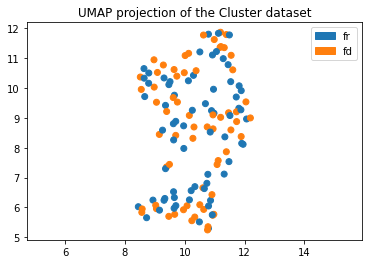

In [35]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in df.group.map({"fr":0, "fd":1})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Cluster dataset')


fr_patch = mpatches.Patch(color=sns.color_palette()[0], label='fr')
fd_patch = mpatches.Patch(color=sns.color_palette()[1], label='fd')

plt.legend(handles=[fr_patch, fd_patch])

#plt.savefig("cluster_umap.png")
plt.show()

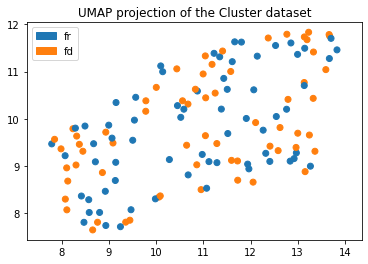

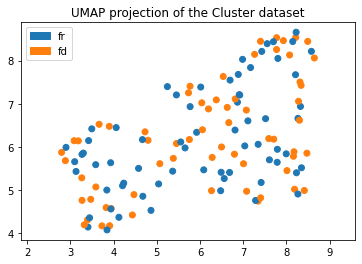

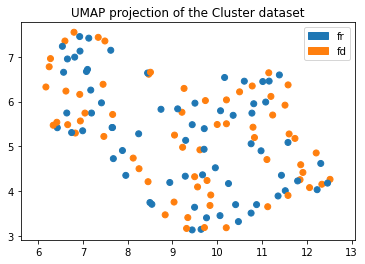

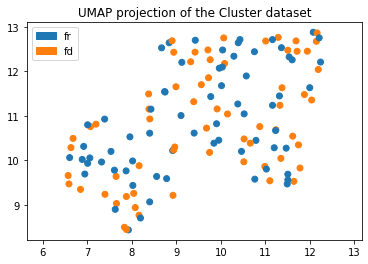

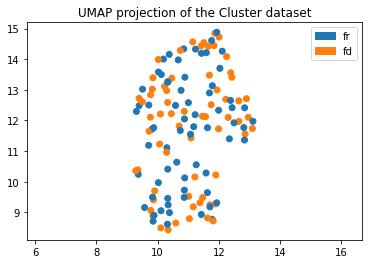

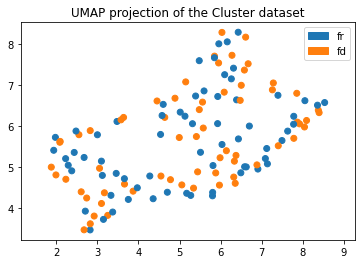

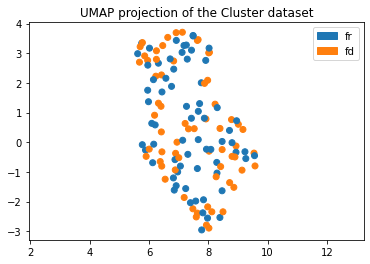

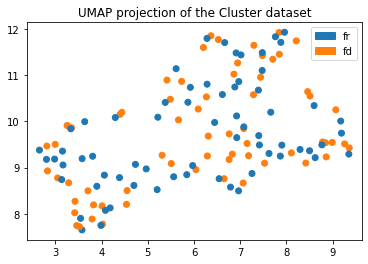

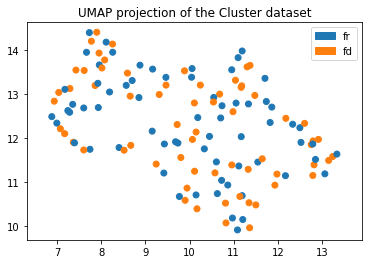

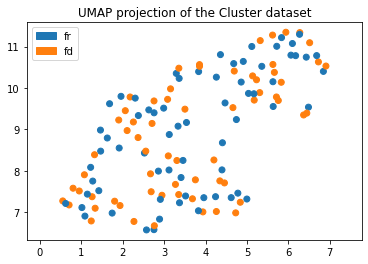

In [36]:
for i in range(10):
    embedding = reducer.fit_transform(scaled_cluster_data)
    embedding.shape
    
    plt.scatter(
        embedding[:, 0],
        embedding[:, 1],
        c=[sns.color_palette()[x] for x in df.group.map({"fr":0, "fd":1})])
    plt.gca().set_aspect('equal', 'datalim')
    plt.title('UMAP projection of the Cluster dataset')


    fr_patch = mpatches.Patch(color=sns.color_palette()[0], label='fr')
    fd_patch = mpatches.Patch(color=sns.color_palette()[1], label='fd')

    plt.legend(handles=[fr_patch, fd_patch])

    #plt.savefig("cluster_umap.png")
    plt.show()